In [1]:
import sys
sys.path.insert(0, '/home/jovyan/analysis')
import osiris

In [ ]:
dirname = 'rundir'
osiris.run_upic_es(rundir=dirname, inputfile='upic-es-iaw.in')

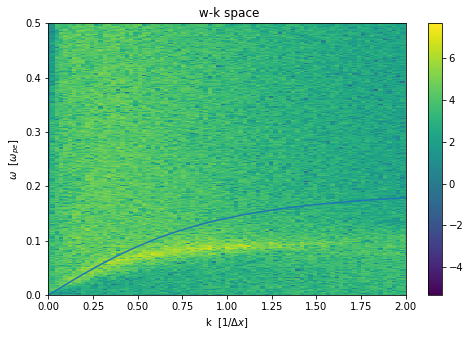

In [2]:
osiris.wk_upic_iaw(rundir='rundir', field='Ex', c_s=0.2, wlim=[0,0.5],klim=[0,2])

In [ ]:
# IAW theory
import numpy as np
from matplotlib import pyplot as plt

def w(k):
    c_s = 1
    k_DE = 1
#     w = k*c_s/np.sqrt(1+(k/k_DE)**2)
    w = k/np.sqrt(1+k**2)
    return w

ks = np.linspace(0,3,100)
ws = w(ks)

plt.plot(ks,ws)

* consider two cases:
    * with ZTe/Ti~1, apparently get strong ion landau damping
    * with ZTe/Ti>10 (maybe 10 or 15?), this is when you get the fluid description of landau damping
* Fluid theory disp relation: 
    $\omega$ = $\frac{kc_s}{\sqrt{1+(k/k_{DE})^2}}$
* Kinetic Theory
   $\epsilon(k,\omega)$ = $1-\frac{1}{2} \frac{k^2}{kde^2}$ $\left[Z'(S_e) + \Theta Z'(S_i) \right]$

In [ ]:
def zfunc(z):
    a = special.wofz(z)
    a *= np.sqrt(np.pi)*complex(0,1)
    return a


def zprime(z):

## the line below is needed for the root finder, which uses MP (multi-precision) variables
## instead of real and/or complex, so the first step is to convert the variable "z" from
## of a type

    arg= complex(z.real,z.imag)
    value= zfunc(arg)
    return(-2*(1+z*value))


def landau(karray):

    nk=karray.shape[0]

    results=np.zeros(nk)

    kmin=karray[0]
    kmax=karray[nk-1]

    if (kmin!=0.0):
        root_trial=complex(1,0)

        for k_val in np.arange(0.01,kmin,0.01):
            def epsilon(omega):
                return 1-0.5*((1.0/k_val)**2)*zprime(omega/(np.sqrt(2)*k_val))
            newroot=mpmath.findroot(epsilon,root_trial,solver='muller')
            root_trial=newroot

        results[0]=newroot.imag
    else:
        results[0]=0.0
        newroot=complex(1,0)
        root_trial=complex(1,0)


    for i_mode in range(1,nk):
        k_val=karray[i_mode]
        def epsilon(omega):
            return 1-0.5*((1.0/k_val)**2)*zprime(omega/(np.sqrt(2)*k_val))
        newroot=mpmath.findroot(epsilon,root_trial,solver='muller')
        root_trial=newroot
        results[i_mode]=newroot.imag

    return results
